In [1]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mwamb\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### https://medium.com/analytics-vidhya/automated-keyword-extraction-from-articles-using-nlp-bfd864f41b34

### https://towardsdatascience.com/text-preprocessing-with-nltk-9de5de891658

https://www.machinelearningplus.com/nlp/lemmatization-examples-python/

https://www.datacamp.com/community/tutorials/stemming-lemmatization-python

https://towardsdatascience.com/introduction-to-natural-language-processing-for-text-df845750fb63

https://www.tutorialspoint.com/natural_language_toolkit/natural_language_toolkit_synonym_antonym_replacement.htm

https://towardsdatascience.com/ai-is-working-against-your-job-application-bec65d496d22

In [2]:
import pandas as pd
import numpy as np
import nltk
import string
import fasttext
import spacy
import contractions
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import matplotlib.pyplot as plt
from nltk import word_tokenize, pos_tag
plt.xticks(rotation=70)
pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', 100)
%matplotlib inline
import importlib
from gensim.summarization import keywords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
#import pickle
import pyLDAvis.sklearn

C:\Users\mwamb\Anaconda3\lib\site-packages\past\builtins\misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping


### Wornet 

### All Lemmas

In [3]:
from nltk.corpus import wordnet as wn
res=wn.synset('locomotive.n.01').lemma_names()
print(res)

['locomotive', 'engine', 'locomotive_engine', 'railway_locomotive']


### Word Definition

In [4]:
from nltk.corpus import wordnet as wn
resdef = wn.synset('ocean.n.01').definition()
print (resdef)

a large body of water constituting a principal part of the hydrosphere


### Usage Examples

In [5]:
from nltk.corpus import wordnet as wn
res_exm = wn.synset('good.n.01').examples()
print(res_exm)

['for your own good', "what's the good of worrying?"]


### Opposite Words

In [6]:
from nltk.corpus import wordnet as wn
# get all the antonyms
res_a = wn.lemma('horizontal.a.01.horizontal').antonyms()
print(res_a)

[Lemma('vertical.a.01.vertical'), Lemma('inclined.a.02.inclined')]


In [7]:
# First, you're going to need to import wordnet: 
from nltk.corpus import wordnet 
  
# Then, we're going to use the term "program" to find synsets like so: 
syns = wordnet.synsets("program") 

In [8]:
# An example of a synset: 
print(syns[0].name()) 

plan.n.01


In [9]:
# Just the word: 
print(syns[0].lemmas()[0].name()) 

plan


In [10]:
# Definition of that first synset: 
print(syns[0].definition()) 

a series of steps to be carried out or goals to be accomplished


In [11]:
# Examples of the word in use in sentences: 
print(syns[0].examples()) 

['they drew up a six-step plan', 'they discussed plans for a new bond issue']


In [12]:
# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()

In [13]:
wn = nltk.WordNetLemmatizer()

In [14]:
print(wn.lemmatize('goose'))

goose


In [15]:
print(wn.lemmatize('geese'))

goose


In [16]:
print(lemmatizer.lemmatize("bats"))

bat


In [17]:
print(lemmatizer.lemmatize("goose"))

goose


In [18]:
print(lemmatizer.lemmatize("geese"))

goose


### Read data

In [19]:
import PyPDF2 as p
df = pd.read_csv("C:/Users/mwamb/Desktop/Desktop/tenthdimensionanalytics/WFP/processed_data/WFP_data.csv")

In [20]:
df

cluster  \
0     WFP   

                                                                                                 words  
0  FOOD SECURITY \n AND NUTRITION \nIN THE WORLD\nTHE STATE OF \nSAFEGUARDING AGAINST \nECONOMIC SL...

In [21]:
#Fetch wordcount for each abstract
df['word_count'] = df['words'].apply(lambda x: len(str(x).split(" ")))
df[['cluster','words','word_count']].head()

cluster  \
0     WFP   

                                                                                                 words  \
0  FOOD SECURITY \n AND NUTRITION \nIN THE WORLD\nTHE STATE OF \nSAFEGUARDING AGAINST \nECONOMIC SL...   

   word_count  
0      236012

In [22]:
##Descriptive statistics of word counts
df.word_count.describe()

count         1.0
mean     236012.0
std           NaN
min      236012.0
25%      236012.0
50%      236012.0
75%      236012.0
max      236012.0
Name: word_count, dtype: float64

In [23]:
def file_reader(file):
    pages = p.PdfFileReader(file)
    p_numbers = pages.getNumPages()
    text = ""
    
    for p_number in range(p_numbers):
        page = pages.getPage(p_number)
        text += page.extractText()
        
    return text

In [24]:
#text_wfp = file_reader("C:/Users/mwamb/Desktop/Desktop/tenthdimensionanalytics/WFP/WFP_result.pdf")

In [25]:
#type(text_wfp)

### Most common and uncommon words

In [26]:
#Identify common words
freq = pd.Series(' '.join(df['words']).split()).value_counts()[:20]
freq

and      9687
the      8443
of       7885
in       5900
to       4246
food     2389
for      1845
a        1803
are      1409
on       1361
is       1315
The      1274
or       1269
by       1153
with     1071
as       1021
that      970
2019      931
from      923
2019.     818
dtype: int64

In [27]:
#Identify uncommon words
freq1 =  pd.Series(' '.join(df['words']).split()).value_counts()[-20:]
freq1

households.7                  1
35(2):                        1
adolescentsOverweight         1
years)ADULTS(18+              1
need.NOTES:                   1
˜˚˛˝).Weather                 1
Specifically:                 1
country5M                     1
PREVALENCE2012Œ2018NUMBERS    1
Ncthe                         1
February.                     1
strike,                       1
spreads,                      1
obstructed                    1
(IIMS).                       1
DRIVERSAfghanistan            1
signiˆcance.                  1
bans                          1
diversity20Œ39                1
0.45,                         1
dtype: int64

## Text Pre-processing

In [28]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()
stem = PorterStemmer()
word = "collaboration"
print("stemming:",stem.stem(word))
print("lemmatization:", lem.lemmatize(word, "v"))

stemming: collabor
lemmatization: collaboration


In [29]:
# Libraries for text preprocessing
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
#nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer

import spacy
sp = spacy.load('en_core_web_sm')


#stoplist = stopwords.words('english') + ['though','www','https','and/or','iv','|','v','puff','Œ','viii','da','ix','cc','by','nc',
# 'sa','igo','2019','2018','(',')','©Shutterstock/Valeriya','Anufriyeva','//creativecommons.org/licenses/by-nc-sa/3.0/igo','BY-NC-SA', 
#'xACKNOWLEDGEMENTS', 'iii','%', '<',  '>', '*', 'n.r','insecurityTotalTotalTotalTotalTotal47.648.328.58.78.58.0|','//iresearch.worldbank.org/PovcalNet/home.aspx',
#                                       'ii', 'viiMETHODOLOGY', 'website','www.fao.org/publication' ]


In [30]:
##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))
##Creating a list of custom stopwords
new_words = ['though','www','https','and/or','iv','|','v','puff','Œ','viii','da','ix','cc','by','nc',
 'sa','igo','2019','2018','(',')','©Shutterstock/Valeriya','Anufriyeva','//creativecommons.org/licenses/by-nc-sa/3.0/igo','BY-NC-SA', 
'xACKNOWLEDGEMENTS', 'iii','%', '<',  '>', '*', 'n.r','insecurityTotalTotalTotalTotalTotal47.648.328.58.78.58.0|','//iresearch.worldbank.org/PovcalNet/home.aspx',
'ii', 'viiMETHODOLOGY', 'website','www.fao.org/publication']
stop_words = stop_words.union(new_words)

In [31]:
df

cluster  \
0     WFP   

                                                                                                 words  \
0  FOOD SECURITY \n AND NUTRITION \nIN THE WORLD\nTHE STATE OF \nSAFEGUARDING AGAINST \nECONOMIC SL...   

   word_count  
0      236012

In [32]:
type(df['words'])

pandas.core.series.Series

In [33]:
corpus = []
for i in range(0, 1):
    #Remove punctuations
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', df['words'][i])
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

In [34]:
#View corpus item
corpus[0]

'food security nutrition world state safeguarding economic slowdown downturnsdemocratic republic congo young woman selling fruit street market cover photograph shutterstock valeriya anufriyeva flagship publication part state world series food agriculture organization united nation required citation fao ifad unicef wfp state food security nutrition world safeguarding economic slowdown downturn rome fao licence designation employed presentation material information product imply expression opinion whatsoever part food agriculture organization united nation fao international fund agricultural development ifad united nation child fund unicef world food programme wfp world health organization concerning legal development status country territory city area authority concerning delimitation frontier boundary mention specific company product manufacturer whether patented imply endorsed recommended fao ifad unicef wfp preference others similar nature mentioned designation employed presentation 

## Data Exploration

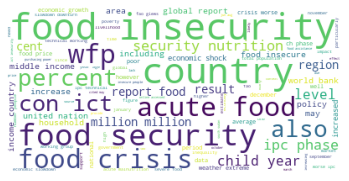

In [35]:

#Word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

In [36]:
type(corpus)

list

In [37]:
corpus_str = ', '.join(corpus)

In [38]:
corpus_str

'food security nutrition world state safeguarding economic slowdown downturnsdemocratic republic congo young woman selling fruit street market cover photograph shutterstock valeriya anufriyeva flagship publication part state world series food agriculture organization united nation required citation fao ifad unicef wfp state food security nutrition world safeguarding economic slowdown downturn rome fao licence designation employed presentation material information product imply expression opinion whatsoever part food agriculture organization united nation fao international fund agricultural development ifad united nation child fund unicef world food programme wfp world health organization concerning legal development status country territory city area authority concerning delimitation frontier boundary mention specific company product manufacturer whether patented imply endorsed recommended fao ifad unicef wfp preference others similar nature mentioned designation employed presentation 

In [39]:
corpus_pos = nltk.word_tokenize(corpus_str)
print(nltk.pos_tag(corpus_pos))

[('food', 'NN'), ('security', 'NN'), ('nutrition', 'NN'), ('world', 'NN'), ('state', 'NN'), ('safeguarding', 'VBG'), ('economic', 'JJ'), ('slowdown', 'NN'), ('downturnsdemocratic', 'JJ'), ('republic', 'NN'), ('congo', 'NN'), ('young', 'JJ'), ('woman', 'NN'), ('selling', 'VBG'), ('fruit', 'JJ'), ('street', 'NN'), ('market', 'NN'), ('cover', 'NN'), ('photograph', 'NN'), ('shutterstock', 'NN'), ('valeriya', 'NN'), ('anufriyeva', 'JJ'), ('flagship', 'NN'), ('publication', 'NN'), ('part', 'NN'), ('state', 'NN'), ('world', 'NN'), ('series', 'NN'), ('food', 'NN'), ('agriculture', 'NN'), ('organization', 'NN'), ('united', 'JJ'), ('nation', 'NN'), ('required', 'VBN'), ('citation', 'NN'), ('fao', 'NN'), ('ifad', 'NN'), ('unicef', 'JJ'), ('wfp', 'NN'), ('state', 'NN'), ('food', 'NN'), ('security', 'NN'), ('nutrition', 'NN'), ('world', 'NN'), ('safeguarding', 'VBG'), ('economic', 'JJ'), ('slowdown', 'NN'), ('downturn', 'NN'), ('rome', 'NN'), ('fao', 'NN'), ('licence', 'NN'), ('designation', 'NN'),

In [40]:
corpus_pos1 = nltk.pos_tag(corpus_pos)

In [41]:
corpus_pos1[:30]

[('food', 'NN'),
 ('security', 'NN'),
 ('nutrition', 'NN'),
 ('world', 'NN'),
 ('state', 'NN'),
 ('safeguarding', 'VBG'),
 ('economic', 'JJ'),
 ('slowdown', 'NN'),
 ('downturnsdemocratic', 'JJ'),
 ('republic', 'NN'),
 ('congo', 'NN'),
 ('young', 'JJ'),
 ('woman', 'NN'),
 ('selling', 'VBG'),
 ('fruit', 'JJ'),
 ('street', 'NN'),
 ('market', 'NN'),
 ('cover', 'NN'),
 ('photograph', 'NN'),
 ('shutterstock', 'NN'),
 ('valeriya', 'NN'),
 ('anufriyeva', 'JJ'),
 ('flagship', 'NN'),
 ('publication', 'NN'),
 ('part', 'NN'),
 ('state', 'NN'),
 ('world', 'NN'),
 ('series', 'NN'),
 ('food', 'NN'),
 ('agriculture', 'NN')]

In [42]:
nouns=[]
nouns = [word for (word, pos) in corpus_pos1 if (pos == 'NN' or pos == 'NNS')] 

In [43]:
nouns

['food',
 'security',
 'nutrition',
 'world',
 'state',
 'slowdown',
 'republic',
 'congo',
 'woman',
 'street',
 'market',
 'cover',
 'photograph',
 'shutterstock',
 'valeriya',
 'flagship',
 'publication',
 'part',
 'state',
 'world',
 'series',
 'food',
 'agriculture',
 'organization',
 'nation',
 'citation',
 'fao',
 'ifad',
 'wfp',
 'state',
 'food',
 'security',
 'nutrition',
 'world',
 'slowdown',
 'downturn',
 'rome',
 'fao',
 'licence',
 'designation',
 'presentation',
 'material',
 'information',
 'product',
 'imply',
 'opinion',
 'part',
 'food',
 'agriculture',
 'organization',
 'nation',
 'fund',
 'development',
 'ifad',
 'nation',
 'child',
 'fund',
 'world',
 'food',
 'programme',
 'world',
 'health',
 'organization',
 'development',
 'status',
 'country',
 'city',
 'area',
 'authority',
 'delimitation',
 'mention',
 'company',
 'product',
 'manufacturer',
 'imply',
 'fao',
 'ifad',
 'wfp',
 'preference',
 'others',
 'nature',
 'designation',
 'presentation',
 'material'

In [44]:
type(nouns)

list

## Synonyms

In [45]:
synonyms = []

In [46]:
for token in nouns:
    synsets = wordnet.synsets(token)
    for syn in synsets:
        for lemma in syn.lemmas():
            synonyms.append(lemma.name())
    

In [47]:
print(synonyms[:100])
#print(synonyms[-4])

['food', 'nutrient', 'food', 'solid_food', 'food', 'food_for_thought', 'intellectual_nourishment', 'security', 'security', 'protection', 'security', 'security', 'certificate', 'security', 'surety', 'security', 'security_department', 'security', 'surety', 'security_system', 'security_measure', 'security', 'security', 'security_measures', 'nutrition', 'nutriment', 'nourishment', 'nutrition', 'sustenance', 'aliment', 'alimentation', 'victuals', 'nutrition', 'universe', 'existence', 'creation', 'world', 'cosmos', 'macrocosm', 'world', 'domain', 'world', 'reality', 'Earth', 'earth', 'world', 'globe', 'populace', 'public', 'world', 'world', 'worldly_concern', 'earthly_concern', 'world', 'earth', 'world', 'human_race', 'humanity', 'humankind', 'human_beings', 'humans', 'mankind', 'man', 'global', 'planetary', 'world', 'worldwide', 'world-wide', 'state', 'province', 'state', 'state', 'state', 'nation', 'country', 'land', 'commonwealth', 'res_publica', 'body_politic', 'state_of_matter', 'state'

In [48]:
wordnet_lemmatizer = WordNetLemmatizer()

In [49]:
wnl = WordNetLemmatizer()

In [50]:
final_wordnet =[]
for word in nouns:
    final_wordnet.append(wordnet_lemmatizer.lemmatize(word))

In [51]:
final_wordnet

['food',
 'security',
 'nutrition',
 'world',
 'state',
 'slowdown',
 'republic',
 'congo',
 'woman',
 'street',
 'market',
 'cover',
 'photograph',
 'shutterstock',
 'valeriya',
 'flagship',
 'publication',
 'part',
 'state',
 'world',
 'series',
 'food',
 'agriculture',
 'organization',
 'nation',
 'citation',
 'fao',
 'ifad',
 'wfp',
 'state',
 'food',
 'security',
 'nutrition',
 'world',
 'slowdown',
 'downturn',
 'rome',
 'fao',
 'licence',
 'designation',
 'presentation',
 'material',
 'information',
 'product',
 'imply',
 'opinion',
 'part',
 'food',
 'agriculture',
 'organization',
 'nation',
 'fund',
 'development',
 'ifad',
 'nation',
 'child',
 'fund',
 'world',
 'food',
 'programme',
 'world',
 'health',
 'organization',
 'development',
 'status',
 'country',
 'city',
 'area',
 'authority',
 'delimitation',
 'mention',
 'company',
 'product',
 'manufacturer',
 'imply',
 'fao',
 'ifad',
 'wfp',
 'preference',
 'others',
 'nature',
 'designation',
 'presentation',
 'material'

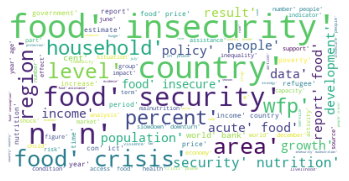

In [52]:
#Word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

wordcloud = WordCloud(
                          background_color='white',
                         
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(nouns))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

In [53]:
tf_vectorizer = CountVectorizer(max_df=1.0, min_df=1, max_features=None)
tf = tf_vectorizer.fit_transform(nouns)
tf_feature_names = tf_vectorizer.get_feature_names()
doc_term_matrix = pd.DataFrame(tf.toarray(), columns=list(tf_feature_names))
doc_term_matrix

aa  aah  ab  aba  abandon  abandonment  abate  abbreviation  abduction  \
0       0    0   0    0        0            0      0             0          0   
1       0    0   0    0        0            0      0             0          0   
2       0    0   0    0        0            0      0             0          0   
3       0    0   0    0        0            0      0             0          0   
4       0    0   0    0        0            0      0             0          0   
...    ..  ...  ..  ...      ...          ...    ...           ...        ...   
88377   0    0   0    0        0            0      0             0          0   
88378   0    0   0    0        0            0      0             0          0   
88379   0    0   0    0        0            0      0             0          0   
88380   0    0   0    0        0            0      0             0          0   
88381   0    0   0    0        0            0      0             0          0   

       abdul  ...  zimvac  zinc  zinder  zitman  zone  zoning  zor  zstep  \
0          0  ...       0     0       0       0     0       0    0      0   
1          0  ...       0     0       0       0     0       0    0      0   
2          0  ...       0     0       0       0     0       0    0      0   
3          0  ...       0     0       0       0     0       0    0      0   
4          0  ...       0     0       0       0     0       0    0      0   
...      ...  ...     ...   ...     ...     ...   ...     ...  ...    ...   
88377      0  ...       0     0       0       0     0       0    0      0   
88378      0  ...       0     0       0       0     0       0    0      0   
88379      0  ...       0     0       0       0     0       0    0      0   
88380      0  ...       0     0       0       0     0       0    0      0   
88381      0  ...       0     0       0       0     0       0    0      0   

       zulia  zwl  
0          0    0  
1          0    0  
2          0    0  
3          0    0  
4          0    0  
...      ...  ...  
88377      0    0  
88378      0    0  
88379      0    0  
88380      0    0  
88381      0    0  

[88382 rows x 6154 columns]

In [54]:
lda_model = LatentDirichletAllocation(n_components=4, learning_method='batch', max_iter=5, random_state=0).fit(tf)
no_top_words = 10
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                          for i in topic.argsort()[:-no_top_words - 1:-1]]))
              
display_topics(lda_model, tf_feature_names, no_top_words)

Topic 0:
insecurity population household malnutrition area number percent development health growth
Topic 1:
people nutrition phase wfp commodity shock age refugee fao group
Topic 2:
food crisis year security level child access poverty ipc assistance
Topic 3:
country income world report price prevalence analysis data source situation


In [55]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda_model, tf, tf_vectorizer, mds='tsne')
panel

C:\Users\mwamb\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
2       47.172672 -362.084503       1        1  25.847513
3      276.189331 -292.695801       2        1  25.128410
0      -22.217518 -133.068283       3        1  24.564149
1      206.799118  -63.679634       4        1  24.459929, topic_info=     Category         Freq        Term        Total  loglift  logprob
2208  Default  3462.000000        food  3462.000000  30.0000  30.0000
1304  Default  1759.000000     country  1759.000000  29.0000  29.0000
2908  Default  1122.000000  insecurity  1122.000000  28.0000  28.0000
1342  Default   977.000000      crisis   977.000000  27.0000  27.0000
6099  Default   945.000000        year   945.000000  26.0000  26.0000
...       ...          ...         ...          ...      ...      ...
5997   Topic4   158.154953     weather   158.851669   1.4037  -4.8887
3528   Topic4   152.447077         map   153.143795   1.4036  -4.9255
5070   Topic4   149.593141      season   150.289858   1.4035  -4.9444
1758   Topic4   145.787892      driver   146.484608   1.4034  -4.9701
4422   Topic4   144.836579         pou   145.533296   1.4033  -4.9767

[150 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
30        1  0.999140   access
67        2  0.998397   action
73        2  0.996025    acute
103       1  0.994575    adult
126       1  0.993088   africa
...     ...       ...      ...
5997      4  0.994639  weather
6016      4  0.998970      wfp
6058      4  0.998506    woman
6069      2  0.999048    world
6099      1  0.999494     year

[120 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 1, 2])

## Creating a vector of word counts

In [56]:
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(nouns)

C:\Users\mwamb\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['328', '58', '648', '78', 'anufriyeva', 'aspx', 'creativecommons', 'fao', 'home', 'insecuritytotaltotaltotaltotaltotal47', 'iresearch', 'licenses', 'org', 'povcalnet', 'publication', 'shutterstock', 'valeriya', 'viimethodology', 'worldbank', 'xacknowledgements'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [57]:
list(cv.vocabulary_.keys())[:10]

['food',
 'security',
 'nutrition',
 'world',
 'state',
 'slowdown',
 'republic',
 'congo',
 'woman',
 'street']

## Visualize top N uni-grams, bi-grams & tri-grams

We can use the CountVectoriser to visualise the top 20 unigrams, bi-grams and tri-grams.

[Text(0, 0, 'food'),
 Text(1, 0, 'country'),
 Text(2, 0, 'insecurity'),
 Text(3, 0, 'crisis'),
 Text(4, 0, 'year'),
 Text(5, 0, 'child'),
 Text(6, 0, 'economic'),
 Text(7, 0, 'population'),
 Text(8, 0, 'ipc'),
 Text(9, 0, 'nutrition'),
 Text(10, 0, 'wfp'),
 Text(11, 0, 'people'),
 Text(12, 0, 'income'),
 Text(13, 0, 'security'),
 Text(14, 0, 'household'),
 Text(15, 0, 'percent'),
 Text(16, 0, 'global'),
 Text(17, 0, 'report'),
 Text(18, 0, 'world'),
 Text(19, 0, 'acute')]

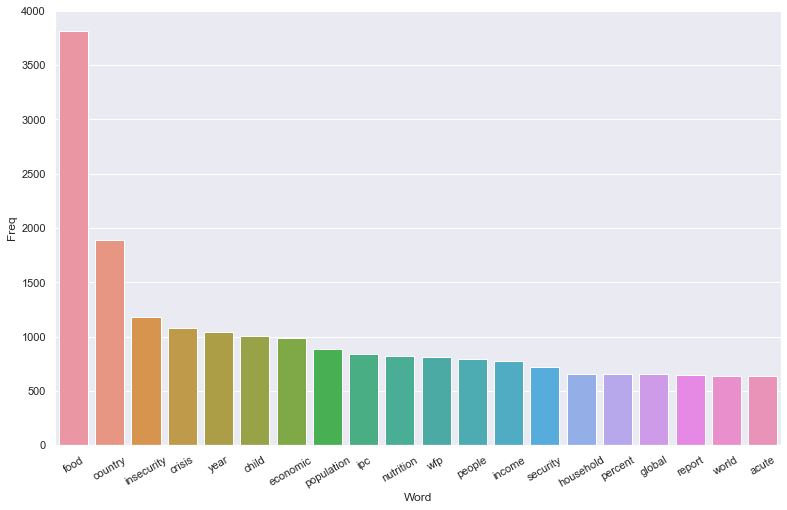

In [58]:
#Most frequently occuring words
def get_top_n_words(nouns, n=None):
    vec = CountVectorizer().fit(nouns)
    bag_of_words = vec.transform(nouns)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]
#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

               Bi-gram  Freq
0      food insecurity   953
1        food security   617
2           acute food   457
3          food crisis   438
4              con ict   298
5   security nutrition   293
6            ipc phase   287
7           child year   270
8          report food   267
9      million million   267
10       global report   247
11       middle income   240
12       united nation   237
13       food insecure   228
14          world bank   226
15      income country   208
16      economic shock   197
17     economic growth   189
18          food price   188
19        crisis worse   182


[Text(0, 0, 'food insecurity'),
 Text(1, 0, 'food security'),
 Text(2, 0, 'acute food'),
 Text(3, 0, 'food crisis'),
 Text(4, 0, 'con ict'),
 Text(5, 0, 'security nutrition'),
 Text(6, 0, 'ipc phase'),
 Text(7, 0, 'child year'),
 Text(8, 0, 'report food'),
 Text(9, 0, 'million million'),
 Text(10, 0, 'global report'),
 Text(11, 0, 'middle income'),
 Text(12, 0, 'united nation'),
 Text(13, 0, 'food insecure'),
 Text(14, 0, 'world bank'),
 Text(15, 0, 'income country'),
 Text(16, 0, 'economic shock'),
 Text(17, 0, 'economic growth'),
 Text(18, 0, 'food price'),
 Text(19, 0, 'crisis worse')]

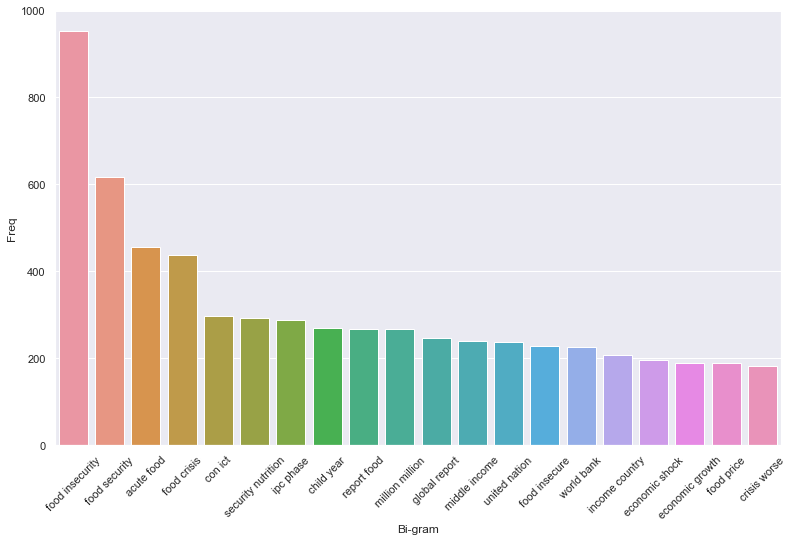

In [59]:
#Most frequently occuring Bi-grams
def get_top_n2_words(nouns, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),max_features=None).fit(nouns)
  
    bag_of_words = vec1.transform(nouns)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1],reverse=True)
    return words_freq[:n]

top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)

#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

                        Tri-gram  Freq
0          acute food insecurity   416
1        food security nutrition   289
2             report food crisis   259
3             global report food   245
4        million million million   236
5        technical working group   142
6         severe food insecurity   140
7               crisis worse ipc   140
8          ipc technical working   133
9     economic slowdown downturn   127
10         middle income country   122
11          food insecure people   108
12               worse ipc phase   104
13                child year age   102
14  food insecurity malnutrition   101
15            con ict insecurity    99
16     democratic republic congo    93
17           boundary name shown    86
18        name shown designation    86
19        shown designation used    86


[Text(0, 0, 'acute food insecurity'),
 Text(1, 0, 'food security nutrition'),
 Text(2, 0, 'report food crisis'),
 Text(3, 0, 'global report food'),
 Text(4, 0, 'million million million'),
 Text(5, 0, 'technical working group'),
 Text(6, 0, 'severe food insecurity'),
 Text(7, 0, 'crisis worse ipc'),
 Text(8, 0, 'ipc technical working'),
 Text(9, 0, 'economic slowdown downturn'),
 Text(10, 0, 'middle income country'),
 Text(11, 0, 'food insecure people'),
 Text(12, 0, 'worse ipc phase'),
 Text(13, 0, 'child year age'),
 Text(14, 0, 'food insecurity malnutrition'),
 Text(15, 0, 'con ict insecurity'),
 Text(16, 0, 'democratic republic congo'),
 Text(17, 0, 'boundary name shown'),
 Text(18, 0, 'name shown designation'),
 Text(19, 0, 'shown designation used')]

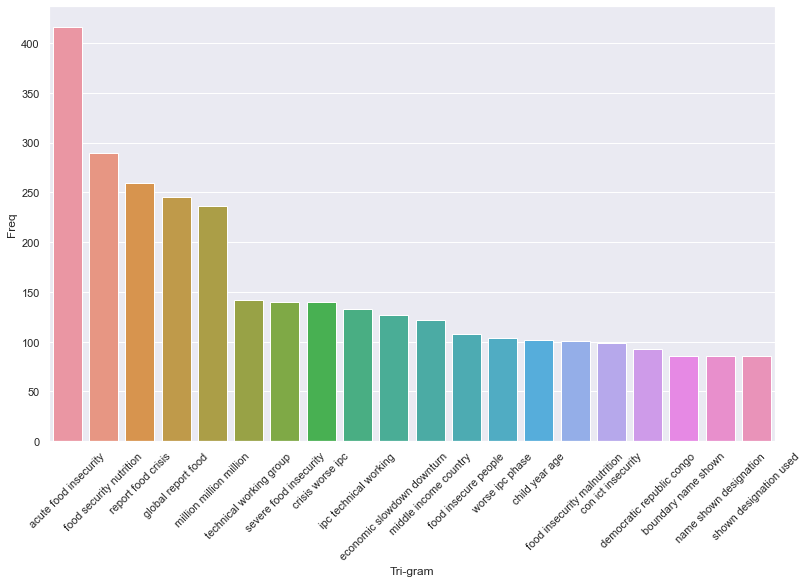

In [60]:
#Most frequently occuring Tri-grams
def get_top_n3_words(nouns, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(nouns)
    bag_of_words = vec1.transform(nouns)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)
#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)

## Find keywords from the clean document  with Gensim

In [61]:
from gensim.summarization import keywords

In [62]:
# using list comprehension 
final_wordnet_listToStr = ' '.join([str(elem) for elem in final_wordnet]) 
  
print(final_wordnet_listToStr)

food security nutrition world state slowdown republic congo woman street market cover photograph shutterstock valeriya flagship publication part state world series food agriculture organization nation citation fao ifad wfp state food security nutrition world slowdown downturn rome fao licence designation presentation material information product imply opinion part food agriculture organization nation fund development ifad nation child fund world food programme world health organization development status country city area authority delimitation mention company product manufacturer imply fao ifad wfp preference others nature designation presentation material map imply expression opinion part fao ifad wfp status country territory sea area delimitation precaution fao ifad wfp verify information publication material warranty kind responsibility interpretation lie reader event wfp damage use isbn fao work attribution sharealike licence creativecommons term licence work purpose work use work

In [63]:
k_words = keywords(final_wordnet_listToStr)

In [64]:
print(k_words)

year
income
household
report
reporting
insecure
insecur
percent
regionalism
number people
develop
food security nutrition world state slowdown republic congo woman
price
child
malnutrition
fao ifad wfp
status country city area authority
analysis data
growth poverty
refugee
result
access
accessibility
accessible
health
driver crisis level acute
grouping
groupe
cent
source
shock
situation
production resource
government
governance
insecurity progress
secure
communication
commune
fund development
prevalent
increase
risk
marketing
december
inequity
service
role inequality policy
impact
rate
figure
assist
indicator
indicate
indication
indicates
indicating
nationality
obesity age group
estimate
estimation
severity differs region
ipc
term
periodicity
periodic
camp
variability productivity
bank
response
responsive
responsiveness
march
june
activity
chang
effect
effectiveness
emerge
emergency
emergence
work
support
july
julie
sectoral
trading
trend hunger
livelihood
strategy availability time
su

### This first function identifies the synonyms of a given word and pre-processes them.

In [65]:
stop_words = stopwords.words('english')

def get_synonyms(word):
    """
    Get synonyms of a word
    """
    synonyms = set()
    
    for syn in wordnet.synsets(word): 
        for l in syn.lemmas(): 
            synonym = l.name().replace("_", " ").replace("-", " ").lower()
            synonym = "".join([char for char in synonym if char in ' qwertyuiopasdfghjklzxcvbnm'])
            synonyms.add(synonym) 
    
    if word in synonyms:
        synonyms.remove(word)
    
    return list(synonyms)

### The synonyms are then randomly replaced in the original sentence.

In [66]:

def synonym_replacement(words, n):
    
    words = words.split()
    
    new_words = words.copy()
    random_word_list = list(set([word for word in words if word not in stop_words]))
    random.shuffle(random_word_list)
    num_replaced = 0
    
    for random_word in random_word_list:
        synonyms = get_synonyms(random_word)
        
        if len(synonyms) >= 1:
            synonym = random.choice(list(synonyms))
            new_words = [synonym if word == random_word else word for word in new_words]
            num_replaced += 1
        
        if num_replaced >= n: #only replace up to n words
            break

    sentence = ' '.join(new_words)

    return sentence

In [67]:

import random


In [68]:
syn_replace = synonym_replacement(k_words,500)
syn_replace

'yr income household composition report unsafe insecur percent regionalism identification number people develop food for thought security victuals humanity state slowdown commonwealth congo woman terms nestling malnutrition fao ifad wfp status country metropolis area authority analysis data growing poverty refugee result approach shot accessibility accessible health driver crisis tear down acute grouping groupe centime germ shock site merchandise resource government establishment insecurity progress secure communication commune fund development prevalent increase gamble marketing celestial latitude inequity service go inequality policy impact charge per unit build assist indicator indicate denotation indicates suggest nationality obesity get on group estimate estimation austereness differs region ipc terminus cyclicity periodic camp variability productiveness bank response responsive reactivity butt against june bodily process yangtze kiang effect effectuality egress emergency emergenc